In [78]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
import conorm

In [79]:
# Import of Feelnc Classifier output
clas = pd.read_csv('/home/maggy/LncRNA/10_lncRNA_classification/lncRNA_classes.txt', sep='\t')

In [80]:
clas

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location
0,1,STRG.29214,STRG.29214.1,ccar_ua15-g14201,ccar_ua15-g14201.t1,sense,intergenic,1669,same_strand,upstream
1,1,STRG.5054,STRG.5054.5,ccar_ua02-g2485,ccar_ua02-g2485.t1,sense,intergenic,25375,same_strand,downstream
2,1,STRG.67450,STRG.67450.1,ccar_ub12-g34625,ccar_ub12-g34625.t1,antisense,intergenic,11376,convergent,downstream
3,1,STRG.76350,STRG.76350.1,ccar_ub17-g39263,ccar_ub17-g39263.t1,strand_unknow,intergenic,4256,unknow strand(s),downstream
4,0,STRG.76350,STRG.76350.1,ccar_ub17-g39262,ccar_ub17-g39262.t1,strand_unknow,intergenic,4256,unknow strand(s),downstream
...,...,...,...,...,...,...,...,...,...,...
113760,0,STRG.19943,STRG.19943.1,ccar_ua09-g9512,ccar_ua09-g9512.t2,strand_unknow,intergenic,1081,unknow strand(s),upstream
113761,0,STRG.19943,STRG.19943.1,ccar_ua09-g9512,ccar_ua09-g9512.t1.3.6676f580,strand_unknow,intergenic,1054,unknow strand(s),upstream
113762,0,STRG.19943,STRG.19943.1,ccar_ua09-g9512,ccar_ua09-g9512.t1,strand_unknow,intergenic,1054,unknow strand(s),upstream
113763,0,STRG.19943,STRG.19943.1,ccar_ua09-g9512,ccar_ua09-g9512.t1.1.6676f580,strand_unknow,intergenic,1054,unknow strand(s),upstream


In [82]:
# Import deg_na for interaction partner (gene level) 
deg_na_ip = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_2_deg_geneid/comp_anoxia_normoxia.csv', sep=',')
deg_na_ip = deg_na_ip.rename(columns={'Unnamed: 0': 'gene_id'})
# substitute MSTRG with STRG
deg_na_ip['gene_id'] = deg_na_ip['gene_id'].str.replace('MSTRG', 'STRG')
deg_na_ip['gene_id'] = deg_na_ip['gene_id'].str.lower()

# Import deg_na for DElncRNA (transcript level) 
deg_na_lnc = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_1_deg_transcripts/comp_anoxia_normoxia.csv', sep=',')
deg_na_lnc = deg_na_lnc.rename(columns={'Unnamed: 0': 'transcript_id'})
# substitute MSTRG with STRG
deg_na_lnc['transcript_id'] = deg_na_lnc['transcript_id'].str.replace('MSTRG', 'STRG')
deg_na_lnc['transcript_id'] = deg_na_lnc['transcript_id'].str.lower()

In [83]:
deg_na_lnc

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,strg.1.1,1191.353966,0.422069,0.060668,0.717968,0.472777,1.000000
1,strg.1.2,1188.561338,0.424613,0.060693,0.759578,0.447507,1.000000
2,strg.2.1,1.009087,-1.410735,1.258514,-0.820193,0.412106,1.000000
3,ccar_ua01-g3.t2,151.067385,-0.551450,0.107964,-1.601817,0.109196,0.322301
4,ccar_ua01-g3.t2.1.6676fed8,153.718377,-0.551941,0.107589,-1.611961,0.106970,0.316432
...,...,...,...,...,...,...,...
125823,scaffold_72-g45758.t1,6.212233,-1.303093,0.531051,-1.741042,0.081676,0.248861
125824,scaffold_72-g45759.t1,23.442440,0.567697,0.233187,0.811301,0.417193,1.000000
125825,scaffold_72-g45760.t1,24.303876,0.754413,0.236615,1.588661,0.112137,0.329957
125826,scaffold_129-g45565.t1,6.130054,-0.737369,0.587273,-0.611057,0.541162,1.000000


In [70]:
deg_na_ip

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,strg.1,1161.487576,0.487665,0.062727,1.740125,8.183712e-02,2.412293e-01
1,strg.2,0.995714,-1.337457,1.248161,-0.768287,4.423170e-01,9.827263e-01
2,strg.3,148.424946,-0.498326,0.103499,-1.157637,2.470123e-01,6.181764e-01
3,strg.4,106.220284,-0.106063,0.185338,0.000000,1.000000e+00,1.000000e+00
4,strg.5,248.631957,-0.811516,0.079123,-5.472536,4.436412e-08,3.069655e-07
...,...,...,...,...,...,...,...
41937,scaffold_72-g45758,6.139991,-1.234639,0.526786,-1.625189,1.041224e-01,2.983928e-01
41938,scaffold_72-g45759,21.408926,0.645049,0.246913,1.079479,2.803741e-01,6.853309e-01
41939,scaffold_72-g45760,22.210521,0.827403,0.241954,1.855273,6.355724e-02,1.927425e-01
41940,scaffold_129-g45565,5.475144,-0.715326,0.634966,-0.530444,5.958038e-01,1.000000e+00


In [84]:
# keep the rows that are contained in the interaction partner gene list 
deg_ip = deg_na_ip[deg_na_ip['gene_id'].isin(clas['partnerRNA_gene'])]

# keep the transcripts that are contained in the clas df 
deg_lnc = deg_na_lnc[deg_na_lnc['transcript_id'].isin(clas['lncRNA_transcript'].str.lower())]

In [88]:
deg_ip.drop_duplicates('gene_id')

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
33311,scaffold_1-g45517,0.912256,1.571065,1.450234,0.822318,0.410896,0.927986
33312,scaffold_1-g45522,1.210730,-1.670136,1.333401,-0.968670,0.332710,0.786226
33313,scaffold_1-g45527,2.886884,0.250370,0.799048,0.000000,1.000000,1.000000
33314,scaffold_1-g45531,0.747969,-0.837837,1.550119,-0.296316,0.766989,NaN
33315,scaffold_1-g45532,6.284634,-0.630055,0.418435,-0.601153,0.547738,1.000000
...,...,...,...,...,...,...,...
41930,scaffold_52-g45727,3.765586,0.173898,0.594674,0.000000,1.000000,1.000000
41935,scaffold_55-g45734,3.926091,2.322401,1.390892,1.397585,0.162238,0.436474
41936,scaffold_61-g45750,0.686744,0.371940,1.934067,0.000000,1.000000,NaN
41937,scaffold_72-g45758,6.139991,-1.234639,0.526786,-1.625189,0.104122,0.298393


In [89]:
deg_lnc.drop_duplicates('transcript_id')

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
8,strg.5.1,250.699048,-0.880871,0.080065,-6.274426,3.509255e-10,2.712904e-09
12,strg.9.1,522.234974,0.573545,0.137024,1.423350,1.546347e-01,4.379723e-01
26,strg.17.1,225.404852,0.272174,0.310832,0.000000,1.000000e+00,1.000000e+00
38,strg.24.1,201.125341,-1.015603,0.088509,-7.198008,6.109837e-13,5.688759e-12
39,strg.25.1,40.782178,0.481198,0.206931,0.496237,6.197275e-01,1.000000e+00
...,...,...,...,...,...,...,...
113113,strg.34433.1,9.907526,0.675720,1.252732,0.237248,8.124643e-01,1.000000e+00
113115,strg.34435.1,59.068117,1.934778,2.895696,0.537441,5.909627e-01,1.000000e+00
113119,strg.34439.1,3.537063,-0.014827,2.206632,0.000000,1.000000e+00,1.000000e+00
113130,strg.34443.1,33.889988,-0.106044,0.471636,0.000000,1.000000e+00,1.000000e+00


In [57]:
deg_lnc['transcript_id'].drop_duplicates()

0          strg.51.1
1         strg.108.1
2         strg.133.1
3         strg.157.1
4         strg.214.1
            ...     
1695    strg.34340.1
1696    strg.34345.1
1697    strg.34376.1
1698    strg.34379.1
1699    strg.34414.1
Name: transcript_id, Length: 1611, dtype: object

In [52]:
deg_ip['log2FoldChange']

5034    2.307061
5035    2.611451
5036    3.453161
5037    3.003127
5038    1.062715
          ...   
5919   -0.978585
5920   -1.378683
5921   -1.573564
5922   -1.318460
5923   -2.364288
Name: log2FoldChange, Length: 787, dtype: float64

In [51]:
deg_lnc['log2FoldChange']

0      -1.006653
1      -1.161108
2      -0.635579
3       1.014446
4       2.685984
          ...   
1695   -0.609021
1696   -1.149712
1697    1.984122
1698    2.336098
1699    0.947155
Name: log2FoldChange, Length: 1611, dtype: float64

ValueError: x and y must be the same size

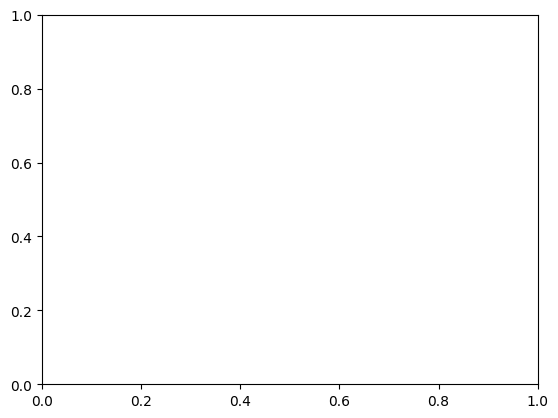

In [53]:
# create scatterplot
plt.scatter(deg_ip['log2FoldChange'], deg_lnc['log2FoldChange'])